In [1]:
import pandas as pd, numpy as np, os
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
output_dir ='/ihme/costeffectiveness/results/vivarium_ciff_sam/v5.2.0_maternal_malnutrition/ciff_sam/2022_01_06_18_17_18/count_data/'

In [3]:
figname = 'model_5.2.0'

In [4]:
os.listdir(output_dir)

['wasting_transition_count.hdf',
 'wasting_transition_count.csv',
 'wasting_state_person_time.hdf',
 'deaths.csv',
 'wasting_state_person_time.csv',
 'deaths.hdf',
 'disease_transition_count.csv',
 'births.csv',
 'population.csv',
 'stunting_state_person_time.hdf',
 'ylds.csv',
 'ylls.csv',
 'disease_state_person_time.csv',
 'population.hdf',
 'ylls.hdf',
 'ylds.hdf',
 'disease_state_person_time.hdf',
 'births.hdf',
 'disease_transition_count.hdf',
 'stunting_state_person_time.csv']

# maternal bmi

In [5]:
births = pd.read_csv(output_dir +'births.csv')
births['maternal_bmi'] = births.sex.str.split('nutrition_', expand=True)[1]
births['sex'] = births.sex.str.split('_maternal', expand=True)[0]
birth_count = births.loc[births.measure=='total_births']
bw_sum = births.loc[births.measure=='birth_weight_sum']
lbw_sum = births.loc[births.measure=='low_weight_births']
birth_count.head()

,Unnamed: 0,sex,year,measure,input_draw,scenario,value,maternal_bmi
72,72,female,2022,total_births,29,baseline,2439.0,cat1
73,73,female,2022,total_births,29,sqlns,2439.0,cat1
74,74,female,2022,total_births,29,wasting_treatment,2439.0,cat1
75,75,female,2022,total_births,223,baseline,2311.0,cat1
76,76,female,2022,total_births,223,sqlns,2311.0,cat1


## check exposure

proportion of babies born to each maternal BMI category
- validation target is 0.224 (95% CI: 0.217, 0.231) for cat1

In [6]:
cols = ['input_draw','scenario','maternal_bmi']
((birth_count.groupby(cols).sum()
 / birth_count.groupby([c for c in cols if c != 'maternal_bmi']).sum())
 .groupby([c for c in cols if c != 'input_draw'])
 .describe(percentiles=[0.025,0.975]))['value']

count      mean       std       min      2.5%  \
scenario          maternal_bmi                                                  
baseline          cat1           12.0  0.224619  0.004556  0.220045  0.220162   
                  cat2           12.0  0.775381  0.004556  0.766184  0.767552   
sqlns             cat1           12.0  0.224619  0.004556  0.220045  0.220162   
                  cat2           12.0  0.775381  0.004556  0.766184  0.767552   
wasting_treatment cat1           12.0  0.224619  0.004556  0.220045  0.220162   
                  cat2           12.0  0.775381  0.004556  0.766184  0.767552   

                                     50%     97.5%       max  
scenario          maternal_bmi                                
baseline          cat1          0.222632  0.232448  0.233816  
                  cat2          0.777368  0.779838  0.779955  
sqlns             cat1          0.222632  0.232448  0.233816  
                  cat2          0.777368  0.779838  0.779955  
wasting_treatment cat1          0.222632  0.232448  0.233816  
                  cat2          0.777368  0.779838  0.779955

In [7]:
# check it does not vary by sex
cols = ['input_draw','scenario','sex','maternal_bmi']
((birth_count.groupby(cols).sum()
 / birth_count.groupby([c for c in cols if c != 'maternal_bmi']).sum())
 .groupby([c for c in cols if c != 'input_draw'])
 .describe(percentiles=[0.025,0.975]))['value']

# looks good

count      mean       std       min  \
scenario          sex    maternal_bmi                                        
baseline          female cat1           12.0  0.224717  0.004443  0.217965   
                         cat2           12.0  0.775283  0.004443  0.768869   
                  male   cat1           12.0  0.224525  0.005111  0.218893   
                         cat2           12.0  0.775475  0.005111  0.763631   
sqlns             female cat1           12.0  0.224717  0.004443  0.217965   
                         cat2           12.0  0.775283  0.004443  0.768869   
                  male   cat1           12.0  0.224525  0.005111  0.218893   
                         cat2           12.0  0.775475  0.005111  0.763631   
wasting_treatment female cat1           12.0  0.224717  0.004443  0.217965   
                         cat2           12.0  0.775283  0.004443  0.768869   
                  male   cat1           12.0  0.224525  0.005111  0.218893   
                         cat2           12.0  0.775475  0.005111  0.763631   

                                           2.5%       50%     97.5%       max  
scenario          sex    maternal_bmi                                          
baseline          female cat1          0.218469  0.223999  0.230727  0.231131  
                         cat2          0.769273  0.776001  0.781531  0.782035  
                  male   cat1          0.218991  0.223127  0.234086  0.236369  
                         cat2          0.765914  0.776873  0.781009  0.781107  
sqlns             female cat1          0.218469  0.223999  0.230727  0.231131  
                         cat2          0.769273  0.776001  0.781531  0.782035  
                  male   cat1          0.218991  0.223127  0.234086  0.236369  
                         cat2          0.765914  0.776873  0.781009  0.781107  
wasting_treatment female cat1          0.218469  0.223999  0.230727  0.231131  
                         cat2          0.769273  0.776001  0.781531  0.782035  
                  male   cat1          0.218991  0.223127  0.234086  0.236369  
                         cat2          0.765914  0.776873  0.781009  0.781107

In [8]:
# check it does not vary by year
cols = ['input_draw','scenario','year','maternal_bmi']
((birth_count.groupby(cols).sum()
 / birth_count.groupby([c for c in cols if c != 'maternal_bmi']).sum())
 .groupby([c for c in cols if c != 'input_draw'])
 .describe(percentiles=[0.025,0.975]))['value'].head(12)

# looks good

count      mean       std       min      2.5%  \
scenario year maternal_bmi                                                  
baseline 2022 cat1           12.0  0.224687  0.005866  0.215584  0.216667   
              cat2           12.0  0.775313  0.005866  0.762175  0.764437   
         2023 cat1           12.0  0.224510  0.005588  0.216446  0.216918   
              cat2           12.0  0.775490  0.005588  0.762897  0.764942   
         2024 cat1           12.0  0.225181  0.005346  0.213901  0.215733   
              cat2           12.0  0.774819  0.005346  0.766693  0.766927   
         2025 cat1           12.0  0.224626  0.005162  0.216639  0.217128   
              cat2           12.0  0.775374  0.005162  0.764162  0.766047   
         2026 cat1           12.0  0.224076  0.005594  0.215417  0.215559   
              cat2           12.0  0.775924  0.005594  0.767956  0.768577   
sqlns    2022 cat1           12.0  0.224687  0.005866  0.215584  0.216667   
              cat2           12.0  0.775313  0.005866  0.762175  0.764437   

                                 50%     97.5%       max  
scenario year maternal_bmi                                
baseline 2022 cat1          0.223695  0.235563  0.237825  
              cat2          0.776305  0.783333  0.784416  
         2023 cat1          0.224127  0.235058  0.237103  
              cat2          0.775873  0.783082  0.783554  
         2024 cat1          0.224816  0.233073  0.233307  
              cat2          0.775184  0.784267  0.786099  
         2025 cat1          0.223455  0.233953  0.235838  
              cat2          0.776545  0.782872  0.783361  
         2026 cat1          0.224945  0.231423  0.232044  
              cat2          0.775055  0.784441  0.784583  
sqlns    2022 cat1          0.223695  0.235563  0.237825  
              cat2          0.776305  0.783333  0.784416

## Birthweight difference by maternal bmi strata

validation target is -138.46 (95% CI: -174.68, -102.25) for cat1 relative to cat2

In [9]:
((bw_sum.groupby(['input_draw','scenario','maternal_bmi']).sum()
 / birth_count.groupby(['input_draw','scenario','maternal_bmi']).sum())
 .groupby(['scenario','maternal_bmi']).describe(percentiles=[0.025,0.975]))['value']

count         mean        std          min  \
scenario          maternal_bmi                                               
baseline          cat1           12.0  3102.900608  31.058100  3052.491014   
                  cat2           12.0  3238.924943  28.646781  3203.940742   
sqlns             cat1           12.0  3102.900608  31.058100  3052.491014   
                  cat2           12.0  3238.924943  28.646781  3203.940742   
wasting_treatment cat1           12.0  3102.900608  31.058100  3052.491014   
                  cat2           12.0  3238.924943  28.646781  3203.940742   

                                       2.5%          50%        97.5%  \
scenario          maternal_bmi                                          
baseline          cat1          3055.881401  3104.406834  3158.441565   
                  cat2          3204.653469  3225.914169  3284.269681   
sqlns             cat1          3055.881401  3104.406834  3158.441565   
                  cat2          3204.653469  3225.914169  3284.269681   
wasting_treatment cat1          3055.881401  3104.406834  3158.441565   
                  cat2          3204.653469  3225.914169  3284.269681   

                                        max  
scenario          maternal_bmi               
baseline          cat1          3165.376615  
                  cat2          3284.655528  
sqlns             cat1          3165.376615  
                  cat2          3284.655528  
wasting_treatment cat1          3165.376615  
                  cat2          3284.655528

In [10]:
data = (bw_sum.groupby(['input_draw','scenario','maternal_bmi']).sum()
 / birth_count.groupby(['input_draw','scenario','maternal_bmi']).sum())[['value']].reset_index()
diff = (data.loc[data.maternal_bmi=='cat1'].drop(columns='maternal_bmi').set_index(['input_draw','scenario']) 
        - data.loc[data.maternal_bmi=='cat2'].drop(columns='maternal_bmi').set_index(['input_draw','scenario']))
diff = diff.groupby(['scenario']).describe(percentiles=[0.025,0.975])
diff
# looks good!

value                                                 \
                  count        mean        std         min        2.5%   
scenario                                                                 
baseline           12.0 -136.024334  19.089244 -176.161188 -169.365537   
sqlns              12.0 -136.024334  19.089244 -176.161188 -169.365537   
wasting_treatment  12.0 -136.024334  19.089244 -176.161188 -169.365537   

                                                       
                          50%       97.5%         max  
scenario                                               
baseline          -138.465015 -107.233419 -105.911834  
sqlns             -138.465015 -107.233419 -105.911834  
wasting_treatment -138.465015 -107.233419 -105.911834

## Check proportion low birth weight

This does not have a specific verification target, but is good to check and can be compared to other external literature sources for validation

In [11]:
((lbw_sum.groupby(['input_draw','scenario','maternal_bmi']).sum()
 / birth_count.groupby(['input_draw','scenario','maternal_bmi']).sum())
 .groupby(['scenario','maternal_bmi']).describe(percentiles=[0.025,0.975]))['value']

count      mean       std       min      2.5%  \
scenario          maternal_bmi                                                  
baseline          cat1           12.0  0.140027  0.009837  0.122134  0.124139   
                  cat2           12.0  0.091282  0.004945  0.083810  0.083867   
sqlns             cat1           12.0  0.140027  0.009837  0.122134  0.124139   
                  cat2           12.0  0.091282  0.004945  0.083810  0.083867   
wasting_treatment cat1           12.0  0.140027  0.009837  0.122134  0.124139   
                  cat2           12.0  0.091282  0.004945  0.083810  0.083867   

                                     50%     97.5%       max  
scenario          maternal_bmi                                
baseline          cat1          0.141251  0.156659  0.159066  
                  cat2          0.091793  0.097501  0.097755  
sqlns             cat1          0.141251  0.156659  0.159066  
                  cat2          0.091793  0.097501  0.097755  
wasting_treatment cat1          0.141251  0.156659  0.159066  
                  cat2          0.091793  0.097501  0.097755

In [12]:
data = (lbw_sum.groupby(['input_draw','scenario','maternal_bmi']).sum()
 / birth_count.groupby(['input_draw','scenario','maternal_bmi']).sum())[['value']].reset_index()
rr = (data.loc[data.maternal_bmi=='cat1'].drop(columns='maternal_bmi').set_index(['input_draw','scenario']) 
        / data.loc[data.maternal_bmi=='cat2'].drop(columns='maternal_bmi').set_index(['input_draw','scenario']))
rr = rr.groupby(['scenario']).describe(percentiles=[0.025,0.975])
rr

value                                                    \
                  count      mean       std       min      2.5%       50%   
scenario                                                                    
baseline           12.0  1.534277  0.075131  1.421907  1.431632  1.543603   
sqlns              12.0  1.534277  0.075131  1.421907  1.431632  1.543603   
wasting_treatment  12.0  1.534277  0.075131  1.421907  1.431632  1.543603   

                                       
                      97.5%       max  
scenario                               
baseline           1.658724  1.670681  
sqlns              1.658724  1.670681  
wasting_treatment  1.658724  1.670681

In [13]:
wasting_pt = pd.read_csv(output_dir +'births.csv')
wasting_pt

,Unnamed: 0,sex,year,measure,input_draw,scenario,value
0,0,female_maternal_malnutrition_cat1,2022,birth_weight_sum,29,baseline,7.732934e+06
1,1,female_maternal_malnutrition_cat1,2022,birth_weight_sum,29,sqlns,7.732934e+06
2,2,female_maternal_malnutrition_cat1,2022,birth_weight_sum,29,wasting_treatment,7.732934e+06
3,3,female_maternal_malnutrition_cat1,2022,birth_weight_sum,223,baseline,7.208858e+06
4,4,female_maternal_malnutrition_cat1,2022,birth_weight_sum,223,sqlns,7.208858e+06
...,...,...,...,...,...,...,...
2155,2155,male_maternal_malnutrition_cat2,2026,total_births,829,sqlns,8.680000e+03
2156,2156,male_maternal_malnutrition_cat2,2026,total_births,829,wasting_treatment,8.680000e+03
2157,2157,male_maternal_malnutrition_cat2,2026,total_births,946,baseline,8.568000e+03
2158,2158,male_maternal_malnutrition_cat2,2026,total_births,946,sqlns,8.568000e+03


In [14]:
cols = ['input_draw','scenario','sex','age']

wasting_pt = pd.read_csv(output_dir +'wasting_state_person_time.csv').groupby(cols).sum()[['value']]
stunting_pt = pd.read_csv(output_dir +'stunting_state_person_time.csv').groupby(cols).sum()[['value']]
disease_pt = pd.read_csv(output_dir +'disease_state_person_time.csv')
disease_pt['cause'] = disease_pt.cause.str.replace('susceptible_to_','')
disease_pt = disease_pt.groupby(cols+['cause']).sum()[['value']].reset_index()
disease_pt['value'] = disease_pt['value'].round(0)
stunting_pt['value'] = stunting_pt['value'].round(0)
wasting_pt['value'] = wasting_pt['value'].round(0)

assert np.all(disease_pt.loc[disease_pt.cause=='diarrheal_diseases'].drop(columns='cause').set_index(cols) 
        == disease_pt.loc[disease_pt.cause=='lower_respiratory_infections'].drop(columns='cause').set_index(cols))

assert np.all(disease_pt.loc[disease_pt.cause=='diarrheal_diseases'].drop(columns='cause').set_index(cols) 
        == disease_pt.loc[disease_pt.cause=='measles'].drop(columns='cause').set_index(cols))

assert np.all(disease_pt.loc[disease_pt.cause=='diarrheal_diseases'].drop(columns='cause').set_index(cols) 
        == wasting_pt)

assert np.all(disease_pt.loc[disease_pt.cause=='diarrheal_diseases'].drop(columns='cause').set_index(cols) 
        == stunting_pt)

# Wasting and stunting exposures

In [15]:
state_pt = pd.read_csv(output_dir +'wasting_state_person_time.csv')
state_pt.head()

,Unnamed: 0,sex,year,cause,measure,input_draw,scenario,value,x_factor,sq_lns,mam_treatment,sam_treatment,age
0,0,female,2022,mild_child_wasting,state_person_time,29,baseline,0.0,cat2,covered,covered,covered,early_neonatal
1,1,female,2022,mild_child_wasting,state_person_time,29,baseline,0.0,cat1,covered,covered,covered,early_neonatal
2,2,female,2022,mild_child_wasting,state_person_time,29,baseline,0.0,cat2,covered,uncovered,covered,early_neonatal
3,3,female,2022,mild_child_wasting,state_person_time,29,baseline,0.0,cat1,covered,uncovered,covered,early_neonatal
4,4,female,2022,mild_child_wasting,state_person_time,29,baseline,0.0,cat2,covered,covered,uncovered,early_neonatal


In [16]:
groupby_cols = ['input_draw','sex','age','cause']

def calculate_child_growth_exposure_prevalence(risk):
    state_pt = pd.read_csv(output_dir +f'{risk}_state_person_time.csv')
    state_pt = state_pt.loc[state_pt.scenario=='baseline']
    state_pt = state_pt.groupby(groupby_cols).sum()[['value']].reset_index()
    if risk=='wasting':
        state_pt_exposed = state_pt.loc[state_pt.cause.str.contains('acute_malnutrition')]
        state_pt_exposed['cause'] = 'wasted'
    else:
        state_pt_exposed = state_pt.loc[state_pt.cause.isin(['cat1','cat2'])]
        state_pt_exposed['cause'] = 'stunted'
    state_pt_with_exposed = (pd.concat([state_pt, 
                          state_pt_exposed.groupby(groupby_cols).sum().reset_index()],
                         ignore_index=True)
                .set_index(groupby_cols))
    prev = state_pt_with_exposed / state_pt.groupby([c for c in groupby_cols if c != 'cause']).sum()
    prev = prev.groupby([c for c in groupby_cols if c != 'input_draw']).describe(percentiles=[0.025,0.975]).sort_index()
    return prev

In [17]:
wasting_prev = calculate_child_growth_exposure_prevalence('wasting')
wasting_prev.head()

<ipython-input-16-4f0de826d651>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_pt_exposed['cause'] = 'wasted'


value                      \
                                               count      mean       std   
sex    age        cause                                                    
female 1-5_months mild_child_wasting            12.0  0.201807  0.002150   
                  moderate_acute_malnutrition   12.0  0.080255  0.001619   
                  severe_acute_malnutrition     12.0  0.022712  0.001653   
                  susceptible_to_child_wasting  12.0  0.695226  0.004316   
                  wasted                        12.0  0.102967  0.003081   

                                                                              \
                                                     min      2.5%       50%   
sex    age        cause                                                        
female 1-5_months mild_child_wasting            0.196692  0.197416  0.201992   
                  moderate_acute_malnutrition   0.076347  0.077120  0.080397   
                  severe_acute_malnutrition     0.019646  0.019750  0.022990   
                  susceptible_to_child_wasting  0.690754  0.690860  0.694670   
                  wasted                        0.096370  0.097196  0.103447   

                                                                    
                                                   97.5%       max  
sex    age        cause                                             
female 1-5_months mild_child_wasting            0.204110  0.204206  
                  moderate_acute_malnutrition   0.082530  0.082783  
                  severe_acute_malnutrition     0.024808  0.024848  
                  susceptible_to_child_wasting  0.704281  0.706938  
                  wasted                        0.107337  0.107630

In [18]:
stunting_prev = calculate_child_growth_exposure_prevalence('stunting')
stunting_prev.head()

<ipython-input-16-4f0de826d651>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_pt_exposed['cause'] = 'stunted'


value                                          \
                          count      mean       std       min      2.5%   
sex    age        cause                                                   
female 1-5_months cat1     12.0  0.040354  0.004331  0.032028  0.033332   
                  cat2     12.0  0.108149  0.002831  0.103501  0.103723   
                  cat3     12.0  0.204581  0.007764  0.190861  0.190997   
                  cat4     12.0  0.646916  0.007446  0.638113  0.638226   
                  stunted  12.0  0.148503  0.005879  0.138539  0.139483   

                                                         
                                50%     97.5%       max  
sex    age        cause                                  
female 1-5_months cat1     0.040098  0.047987  0.048498  
                  cat2     0.108671  0.112523  0.112788  
                  cat3     0.205184  0.214693  0.215342  
                  cat4     0.645956  0.660832  0.663699  
                  stunted  0.148946  0.158807  0.159428

In [19]:
# artifact
from vivarium import Artifact
art = Artifact('/ihme/costeffectiveness/artifacts/vivarium_ciff_sam/ethiopia.hdf',
               filter_terms=['year_start == 2020', f'age_end <= 5'])

In [20]:
def load_child_growth_artifact_prev(risk):
    data = art.load(f'risk_factor.child_{risk}.exposure').reset_index()
    data_exposed = data.loc[data.parameter.isin(['cat1','cat2'])]
    data_exposed['parameter'] = 'exposed'
    data_exposed = data_exposed.groupby([c for c in data_exposed.columns if c != 'value' and 'draw' not in c]).sum().reset_index()
    data = pd.concat([data,data_exposed], ignore_index=True)
    data = data.set_index([c for c in data.columns if 'draw' not in c])
    data = (data.apply(pd.DataFrame.describe, percentiles=[0.025, 0.975], axis=1)
            .filter(['mean', '2.5%', '97.5%']).reset_index())
    data['age'] = 0
    data['age'] = np.where(data['age_start'] == 0, 'early_neonatal', #1
                                            np.where(data['age_end'] == 0.5, '1-5_months', #3
                                                     np.where(data['age_start'] == 0.5, '6-11_months', #4
                                                              np.where(data['age_start'] == 1, '12_to_23_months',  #5
                                                                       np.where(data['age_start'] == 2, '2_to_4',       #6
                                                                       'late_neonatal'))))) #2
    data['age_group'] = np.where(data['age'] == 'early_neonatal', 1,
                                   np.where(data['age'] == 'late_neonatal', 2,
                                            np.where(data['age'] == '1-5_months', 3, 
                                                     np.where(data['age'] == '6-11_months', 4, 
                                                              np.where(data['age'] == '12_to_23_months', 5,
                                    6)))))
    data['sex'] = np.where(data['sex'] == 'Female', 'female', 'male')
    
    return data

In [21]:
wasting_art = load_child_growth_artifact_prev('wasting')
wasting_art.head()

<ipython-input-20-b4b3aa8f8aaa>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_exposed['parameter'] = 'exposed'


,sex,age_start,age_end,year_start,year_end,parameter,mean,2.5%,97.5%,age,age_group
0,female,0.000000,0.019178,2020,2021,cat1,0.023100,0.019989,0.026792,early_neonatal,1
1,female,0.000000,0.019178,2020,2021,cat2,0.080399,0.076361,0.084449,early_neonatal,1
2,female,0.000000,0.019178,2020,2021,cat3,0.200563,0.195923,0.205312,early_neonatal,1
3,female,0.000000,0.019178,2020,2021,cat4,0.695938,0.687181,0.704784,early_neonatal,1
4,female,0.019178,0.076712,2020,2021,cat1,0.023190,0.019931,0.027105,late_neonatal,2


In [22]:
stunting_art = load_child_growth_artifact_prev('stunting')
stunting_art.head()

<ipython-input-20-b4b3aa8f8aaa>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_exposed['parameter'] = 'exposed'


,sex,age_start,age_end,year_start,year_end,parameter,mean,2.5%,97.5%,age,age_group
0,female,0.000000,0.019178,2020,2021,cat1,0.0,0.0,0.0,early_neonatal,1
1,female,0.000000,0.019178,2020,2021,cat2,0.0,0.0,0.0,early_neonatal,1
2,female,0.000000,0.019178,2020,2021,cat3,0.0,0.0,0.0,early_neonatal,1
3,female,0.000000,0.019178,2020,2021,cat4,1.0,1.0,1.0,early_neonatal,1
4,female,0.019178,0.076712,2020,2021,cat1,0.0,0.0,0.0,late_neonatal,2


In [23]:
def plot_cgf_exposure(wasting_prev, wasting_art, sex, art_severity, sim_severity, title_severity):
    plt.figure(dpi=120)
    a = wasting_art.loc[wasting_art.sex==f'{sex}'].loc[wasting_art.parameter==f'{art_severity}'].reset_index()
    plt.plot(a['age'].values, a['mean'].values, marker='o', label='Artifact')
    plt.fill_between(a['age'], a['2.5%'], a['97.5%'], alpha=0.4)

    s = wasting_prev.reset_index()
    s['order'] = np.where(s.age=='early_neonatal', 0,
                         np.where(s.age=='late_neonatal', 1,
                                 np.where(s.age=='1-5_months',2,
                                         np.where(s.age=='6-11_months',3,
                                                 np.where(s.age=='12_to_23_months',4,5)))))
    s = s.sort_values(by='order')
    s = s.loc[s.sex==f'{sex}'].loc[s.cause==f'{sim_severity}']
    plt.plot(s['age'], s['value','mean'], marker='o', label=f'Simulation baseline')
    plt.fill_between(s['age'], s['value','2.5%'], s['value','97.5%'], alpha=0.2)
    
    plt.xticks(rotation=60)
    plt.title(f'{title_severity} exposure: {sex}s')
    plt.legend()
    plt.ylabel('Proportion')
    plt.ylim(0,max(a['97.5%'])*1.25)
    plt.grid()

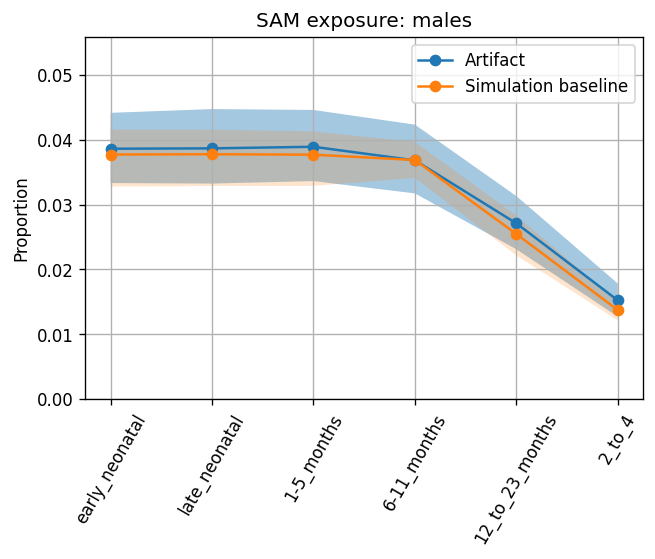

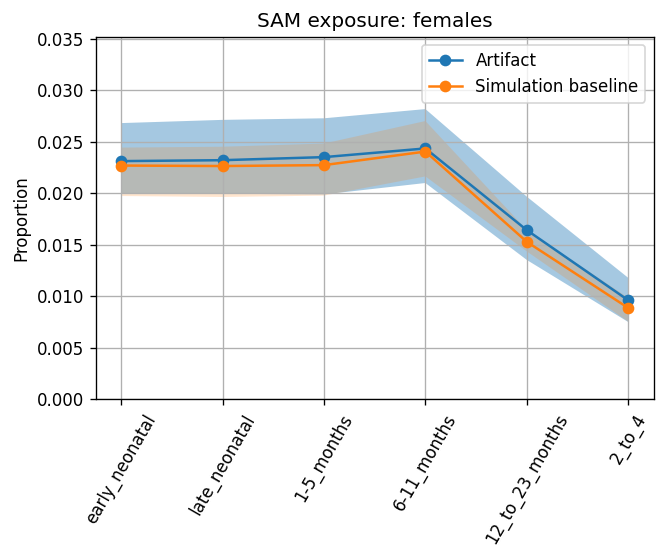

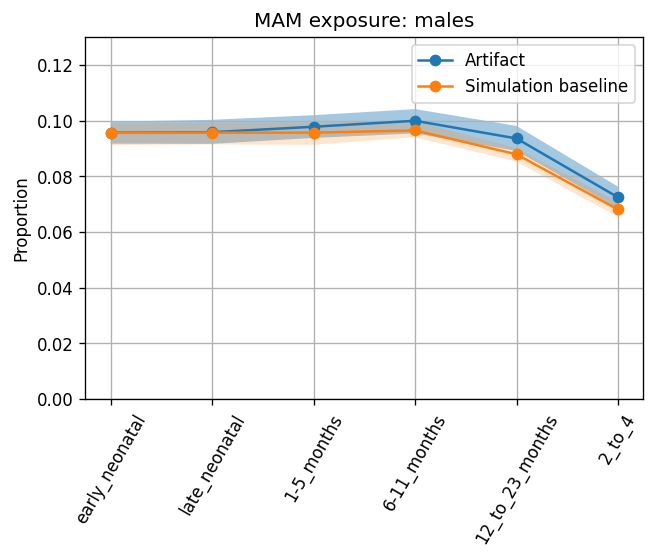

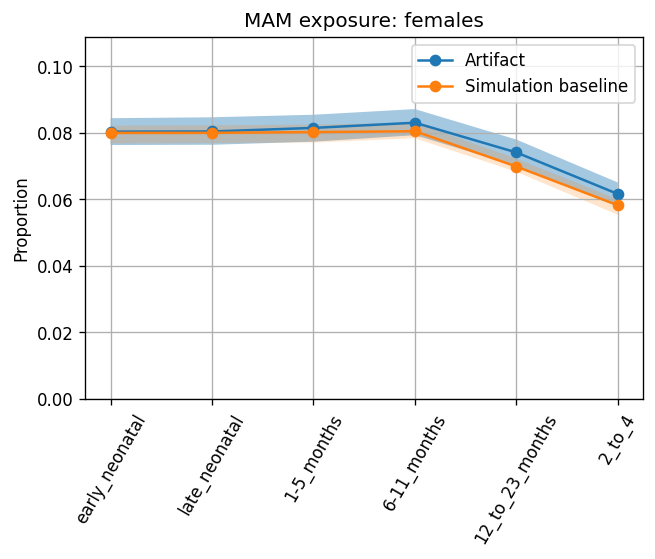

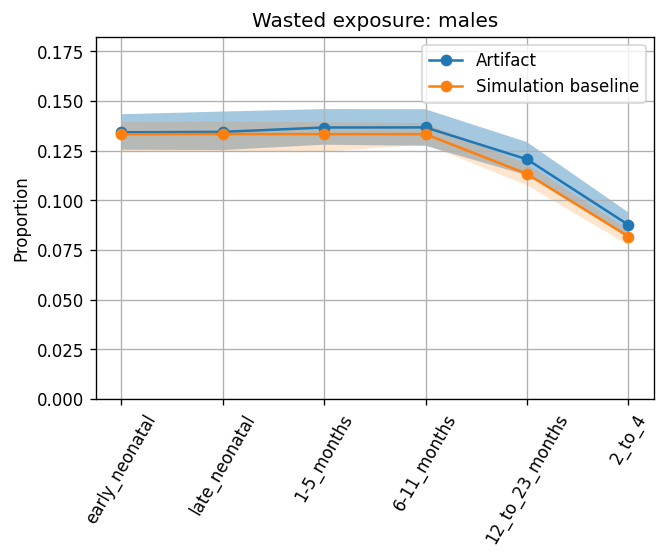

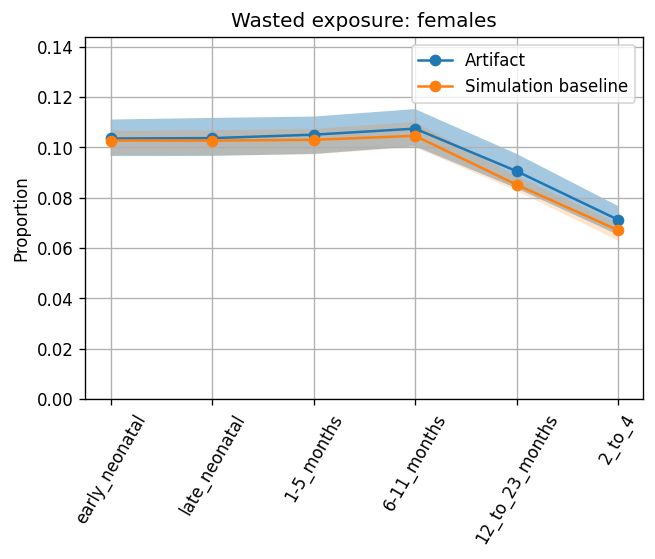

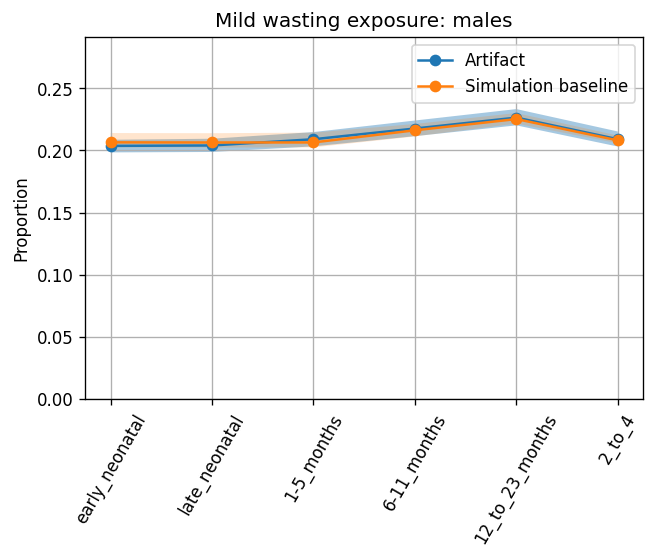

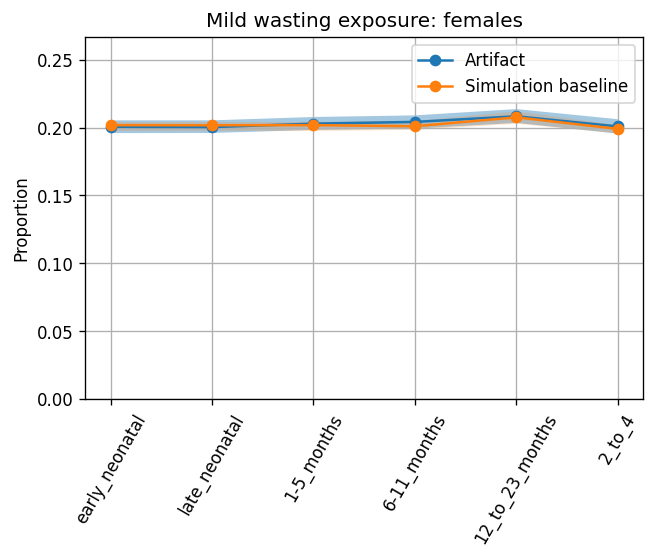

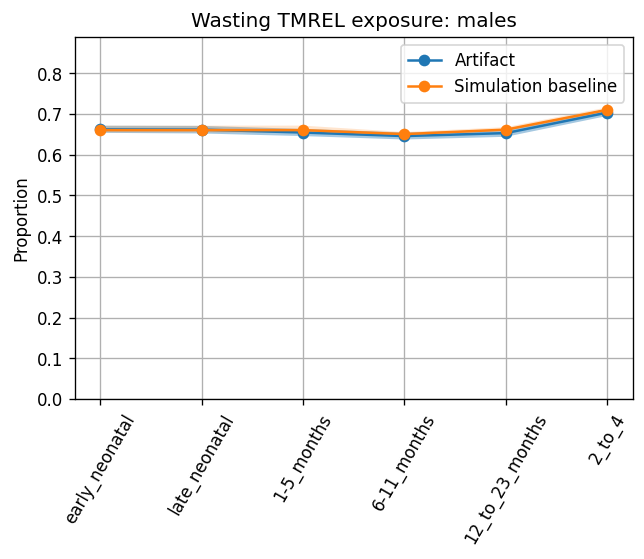

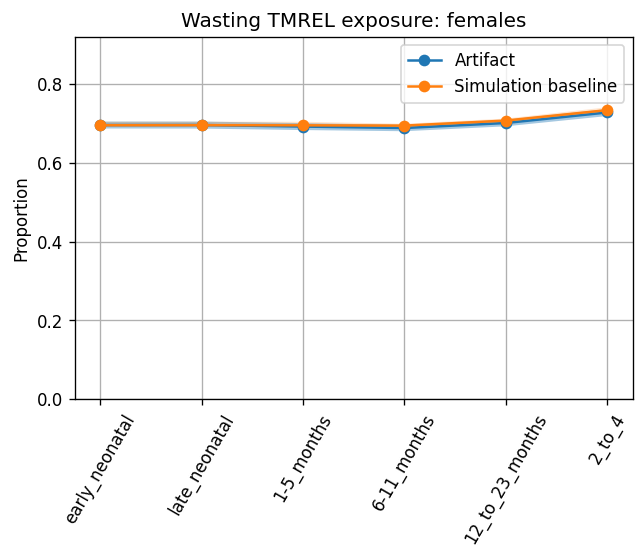

In [24]:
w_sim_cats = ['severe_acute_malnutrition','moderate_acute_malnutrition','wasted',
              'mild_child_wasting','susceptible_to_child_wasting']
s_sim_cats = ['cat1','cat2','stunted',
              'cat3','cat4']
art_cats = ['cat1','cat2','exposed','cat3','cat4']
w_title_cats = ['SAM','MAM','Wasted','Mild wasting','Wasting TMREL']
s_title_cats = ['Severe stunting','Moderate stunting','Stunted','Mild stunting','Stunting TMREL']

with PdfPages(f'plots/{figname}_exposure.pdf') as pdf:
    for i in list(range(0,len(art_cats))):
        for sex in ['male','female']:
            plot_cgf_exposure(wasting_prev, wasting_art, f'{sex}', art_cats[i],
                              w_sim_cats[i], w_title_cats[i])
            pdf.savefig(bbox_inches='tight')
    #for i in list(range(0,len(art_cats))):
    #    for sex in ['male','female']:
    #        plot_cgf_exposure(stunting_prev, stunting_art, f'{sex}', 
    #                          art_cats[i], s_sim_cats[i], s_title_cats[i])
    #        pdf.savefig(bbox_inches='tight')

# Cause parameters

In [25]:
def load_artifact_cause_data(measure, cause):
    data = art.load(f'cause.{cause}.{measure}')
    data = (data.apply(pd.DataFrame.describe, percentiles=[0.025, 0.975], axis=1)
            .filter(['mean', '2.5%', '97.5%']).reset_index())
    data['age'] = 0
    data['age'] = np.where(data['age_start'] == 0, 'early_neonatal', #1
                                            np.where(data['age_end'] == 0.5, '1-5_months', #3
                                                     np.where(data['age_start'] == 0.5, '6-11_months', #4
                                                              np.where(data['age_start'] == 1, '12_to_23_months',  #5
                                                                       np.where(data['age_start'] == 2, '2_to_4',       #6
                                                                       'late_neonatal'))))) #2
    data['age_group'] = np.where(data['age'] == 'early_neonatal', 1,
                                   np.where(data['age'] == 'late_neonatal', 2,
                                            np.where(data['age'] == '1-5_months', 3, 
                                                     np.where(data['age'] == '6-11_months', 4, 
                                                              np.where(data['age'] == '12_to_23_months', 5,
                                    6)))))
    data['sex'] = np.where(data['sex'] == 'Female', 'female', 'male')
    data['measure'] = measure
    data['cause'] = cause
    return data

In [26]:
artifact_data = pd.DataFrame()
causes=['all_causes','diarrheal_diseases','lower_respiratory_infections','protein_energy_malnutrition','measles']
measures=['prevalence','incidence_rate','remission_rate',
               'cause_specific_mortality_rate','excess_mortality_rate']
for cause in causes:    
    for measure in measures:
        try:
            temp = load_artifact_cause_data(measure, cause)
            artifact_data = pd.concat([artifact_data,temp], ignore_index=True)
        except:
            pass

artifact_data.head()

,sex,age_start,age_end,year_start,year_end,mean,2.5%,97.5%,age,age_group,measure,cause
0,female,0.000000,0.019178,2020,2021,0.869707,0.700294,1.093357,early_neonatal,1,cause_specific_mortality_rate,all_causes
1,female,0.019178,0.076712,2020,2021,0.098099,0.078973,0.123338,late_neonatal,2,cause_specific_mortality_rate,all_causes
2,female,0.076712,0.500000,2020,2021,0.012703,0.010194,0.015891,1-5_months,3,cause_specific_mortality_rate,all_causes
3,female,0.500000,1.000000,2020,2021,0.012703,0.010194,0.015891,6-11_months,4,cause_specific_mortality_rate,all_causes
4,female,1.000000,2.000000,2020,2021,0.003620,0.002928,0.004488,12_to_23_months,5,cause_specific_mortality_rate,all_causes


In [27]:
groupby_cols = ['input_draw','sex','age']

In [28]:
state_pt = pd.read_csv(output_dir + 'disease_state_person_time.csv')
transitions = pd.read_csv(output_dir + 'disease_transition_count.csv')
deaths = pd.read_csv(output_dir + 'deaths.csv')
deaths.head()

,Unnamed: 0,sex,year,cause,measure,input_draw,scenario,value,wasting_state,age
0,0,female,2022,diarrheal_diseases,death,29,baseline,1.0,susceptible_to_child_wasting,early_neonatal
1,1,female,2022,diarrheal_diseases,death,29,baseline,0.0,mild_child_wasting,early_neonatal
2,2,female,2022,diarrheal_diseases,death,29,baseline,0.0,moderate_acute_malnutrition,early_neonatal
3,3,female,2022,diarrheal_diseases,death,29,baseline,0.0,severe_acute_malnutrition,early_neonatal
4,4,female,2022,diarrheal_diseases,death,29,baseline,3.0,susceptible_to_child_wasting,late_neonatal


In [29]:
def calculate_csmr():
    d = deaths.loc[deaths.scenario=='baseline']
    pem = d.loc[d.cause.str.contains('acute_malnutrition')]
    pem['cause'] = 'protein_energy_malnutrition'
    acmr = d.copy()
    acmr['cause'] = 'all_causes'
    d = pd.concat([d.loc[d.cause.isin(['diarrheal_diseases','lower_respiratory_infections','measles'])],
                  pem, acmr], ignore_index=True)
    d = d.groupby(groupby_cols + ['cause']).sum()
    pt = (state_pt.loc[state_pt.cause.str.contains('measles')]
          .loc[state_pt.scenario=='baseline']
          .groupby(groupby_cols).sum())
    d = ((d / pt)[['value']])
         #.groupby([c for c in groupby_cols if c != 'input_draw'] + ['cause'])
         #.describe(percentiles=[0.025,0.975]))
    return d

In [30]:
def calculate_transition_rates():
    trans = transitions.loc[transitions.scenario=='baseline']
    trans['cause'] = trans['measure'].str.split('to_', expand=True)[2].str.split('_event_count', expand=True)[0]
    trans['measure'] = np.where(trans.measure.str.contains('to_susceptible_to'),'remission','incidence')
    trans = trans.groupby(groupby_cols+['cause','measure']).sum()
    pt = (state_pt.loc[state_pt.cause.str.contains('measles')]
          .loc[state_pt.scenario=='baseline']
          .groupby(groupby_cols).sum())
    trans = (trans / pt)[['value']]
    trans = trans#.groupby([c for c in groupby_cols if c != 'input_draw'] + ['cause','measure']).describe(percentiles=[0.025,0.975])
    return trans

In [31]:
def calculate_prevalence(causes):
    s = state_pt.copy()
    s = s.loc[s.scenario=='baseline']
    prev = pd.DataFrame()
    for cause in causes:
        infected = state_pt.loc[state_pt.cause==cause].groupby(groupby_cols + ['cause']).sum()
        total = state_pt.loc[state_pt.cause.str.contains(cause)].groupby(groupby_cols).sum()
        temp = (infected / total)[['value']]#.groupby([c for c in groupby_cols if c != 'input_draw'] + ['cause']).describe(percentiles=[0.025,0.975])
        prev = pd.concat([prev,temp])
    return prev

In [32]:
def calculate_child_growth_exposure_prevalence_by_draw(risk):
    state_pt = pd.read_csv(output_dir +f'{risk}_state_person_time.csv')
    state_pt = state_pt.loc[state_pt.scenario=='baseline']
    state_pt = state_pt.groupby(['input_draw','sex','age','cause']).sum()[['value']]
    prev = state_pt / state_pt.groupby(['input_draw','sex','age']).sum()
    #prev = prev.groupby(['sex','age','cause']).describe(percentiles=[0.025,0.975])
    return prev

In [33]:
csmr = calculate_csmr()
trans = calculate_transition_rates()
prev = calculate_prevalence(['diarrheal_diseases','measles','lower_respiratory_infections'])
pem_prev = calculate_child_growth_exposure_prevalence_by_draw('wasting').reset_index()
pem_prev = (pem_prev.loc[pem_prev.cause.str.contains('acute_malnutrition')]
            .groupby(['input_draw','sex','age']).sum().reset_index())
pem_prev['cause'] = 'protein_energy_malnutrition'
prev = pd.concat([prev.reset_index(), pem_prev], ignore_index=True).set_index(groupby_cols + ['cause'])
remission = trans / prev
emr = csmr / prev

prev=prev.groupby([c for c in groupby_cols if c != 'input_draw'] + ['cause']).describe(percentiles=[0.025,0.975])
trans=trans.groupby([c for c in groupby_cols if c != 'input_draw'] + ['cause','measure']).describe(percentiles=[0.025,0.975])
remission=remission.groupby([c for c in groupby_cols if c != 'input_draw'] + ['cause','measure']).describe(percentiles=[0.025,0.975])
emr=emr.groupby([c for c in groupby_cols if c != 'input_draw'] + ['cause']).describe(percentiles=[0.025,0.975])
csmr=csmr.groupby([c for c in groupby_cols if c != 'input_draw'] + ['cause']).describe(percentiles=[0.025,0.975])

<ipython-input-29-7be1e90e4d88>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pem['cause'] = 'protein_energy_malnutrition'
<ipython-input-30-1d4e092c465b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trans['cause'] = trans['measure'].str.split('to_', expand=True)[2].str.split('_event_count', expand=True)[0]


In [34]:
trans

value            \
                                                            count      mean   
sex    age           cause                        measure                     
female 1-5_months    diarrheal_diseases           incidence  12.0  2.701224   
                                                  remission  12.0  2.726388   
                     lower_respiratory_infections incidence  12.0  0.093552   
                                                  remission  12.0  0.091270   
                     measles                      incidence  12.0  0.020039   
...                                                           ...       ...   
male   late_neonatal diarrheal_diseases           remission  12.0  3.112101   
                     lower_respiratory_infections incidence  12.0  0.087930   
                                                  remission  12.0  0.067529   
                     measles                      incidence  12.0  0.000000   
                                                  remission  12.0  0.000000   

                                                                       \
                                                                  std   
sex    age           cause                        measure               
female 1-5_months    diarrheal_diseases           incidence  0.338059   
                                                  remission  0.327870   
                     lower_respiratory_infections incidence  0.009573   
                                                  remission  0.009575   
                     measles                      incidence  0.010216   
...                                                               ...   
male   late_neonatal diarrheal_diseases           remission  0.254669   
                     lower_respiratory_infections incidence  0.015084   
                                                  remission  0.009290   
                     measles                      incidence  0.000000   
                                                  remission  0.000000   

                                                                       \
                                                                  min   
sex    age           cause                        measure               
female 1-5_months    diarrheal_diseases           incidence  2.135099   
                                                  remission  2.187382   
                     lower_respiratory_infections incidence  0.071964   
                                                  remission  0.069550   
                     measles                      incidence  0.008286   
...                                                               ...   
male   late_neonatal diarrheal_diseases           remission  2.625151   
                     lower_respiratory_infections incidence  0.063604   
                                                  remission  0.051201   
                     measles                      incidence  0.000000   
                                                  remission  0.000000   

                                                                       \
                                                                 2.5%   
sex    age           cause                        measure               
female 1-5_months    diarrheal_diseases           incidence  2.208320   
                                                  remission  2.258277   
                     lower_respiratory_infections incidence  0.075258   
                                                  remission  0.072829   
                     measles                      incidence  0.008365   
...                                                               ...   
male   late_neonatal diarrheal_diseases           remission  2.691176   
                     lower_respiratory_infections incidence  0.065851   
                                                  remission  0.053212   
                     measles   

In [35]:
trans.reset_index().loc[trans.reset_index().cause=='diarrheal_diseases']

sex              age               cause    measure value            \
                                                           count      mean   
0   female       1-5_months  diarrheal_diseases  incidence  12.0  2.701224   
1   female       1-5_months  diarrheal_diseases  remission  12.0  2.726388   
6   female  12_to_23_months  diarrheal_diseases  incidence  12.0  1.518181   
7   female  12_to_23_months  diarrheal_diseases  remission  12.0  1.534628   
12  female           2_to_4  diarrheal_diseases  incidence  12.0  1.515445   
13  female           2_to_4  diarrheal_diseases  remission  12.0  1.514828   
18  female      6-11_months  diarrheal_diseases  incidence  12.0  2.604176   
19  female      6-11_months  diarrheal_diseases  remission  12.0  2.606110   
24  female   early_neonatal  diarrheal_diseases  incidence  12.0  3.279553   
25  female   early_neonatal  diarrheal_diseases  remission  12.0  1.263572   
30  female    late_neonatal  diarrheal_diseases  incidence  12.0  3.382760   
31  female    late_neonatal  diarrheal_diseases  remission  12.0  3.124543   
36    male       1-5_months  diarrheal_diseases  incidence  12.0  2.689585   
37    male       1-5_months  diarrheal_diseases  remission  12.0  2.713526   
42    male  12_to_23_months  diarrheal_diseases  incidence  12.0  1.535557   
43    male  12_to_23_months  diarrheal_diseases  remission  12.0  1.549691   
48    male           2_to_4  diarrheal_diseases  incidence  12.0  1.547553   
49    male           2_to_4  diarrheal_diseases  remission  12.0  1.547030   
54    male      6-11_months  diarrheal_diseases  incidence  12.0  2.570739   
55    male      6-11_months  diarrheal_diseases  remission  12.0  2.572969   
60    male   early_neonatal  diarrheal_diseases  incidence  12.0  3.275710   
61    male   early_neonatal  diarrheal_diseases  remission  12.0  1.257297   
66    male    late_neonatal  diarrheal_diseases  incidence  12.0  3.356070   
67    male    late_neonatal  diarrheal_diseases  remission  12.0  3.112101   

                                                                
         std       min      2.5%       50%     97.5%       max  
0   0.338059  2.135099  2.208320  2.613770  3.205244  3.230268  
1   0.327870  2.187382  2.258277  2.627230  3.215521  3.242264  
6   0.112012  1.343412  1.363906  1.512554  1.718368  1.753158  
7   0.112301  1.356504  1.375834  1.530359  1.734397  1.767721  
12  0.112026  1.342315  1.359843  1.513009  1.709803  1.741789  
13  0.112039  1.341671  1.359164  1.513042  1.709130  1.741051  
18  0.330699  2.033651  2.101569  2.517778  3.063025  3.073341  
19  0.329967  2.039721  2.106993  2.514426  3.063620  3.072953  
24  0.257936  2.719280  2.808717  3.302262  3.565598  3.571068  
25  0.154513  1.046637  1.065624  1.232650  1.535119  1.553071  
30  0.250996  2.784366  2.895967  3.421253  3.690324  3.706194  
31  0.242896  2.570516  2.673660  3.137809  3.436023  3.438812  
36  0.348853  2.103119  2.183142  2.594706  3.206957  3.221614  
37  0.337121  2.161137  2.231274  2.605256  3.219621  3.230533  
42  0.120745  1.403036  1.404755  1.524555  1.738515  1.753040  
43  0.121627  1.416240  1.419401  1.537691  1.755338  1.769965  
48  0.123362  1.396910  1.401525  1.526868  1.741426  1.744753  
49  0.123589  1.396075  1.400812  1.525914  1.740881  1.743972  
54  0.336645  1.974456  2.068181  2.480217  3.081223  3.100832  
55  0.336039  1.980476  2.072962  2.484955  3.081798  3.100051  
60  0.258116  2.709668  2.796786  3.321921  3.563334  3.563917  
61  0.123679  1.036022  1.071700  1.243655  1.447100  1.450789  
66  0.252156  2.813524  2.894949  3.396417  3.668504  3.673625  
67  0.254669  2.625151  2.691176  3.155288  3.470989  3.476841

In [36]:
artifact_data.loc[(artifact_data.cause=='diarrheal_diseases')&(artifact_data.measure.isin(['incidence_rate','remission_rate']))]

,sex,age_start,age_end,year_start,year_end,mean,2.5%,97.5%,age,age_group,measure,cause
24,female,0.000000,0.019178,2020,2021,3.689702,3.233220,3.929672,early_neonatal,1,incidence_rate,diarrheal_diseases
25,female,0.019178,0.076712,2020,2021,3.633241,3.193225,3.878895,late_neonatal,2,incidence_rate,diarrheal_diseases
26,female,0.076712,0.500000,2020,2021,2.913438,2.367051,3.549568,1-5_months,3,incidence_rate,diarrheal_diseases
27,female,0.500000,1.000000,2020,2021,2.913438,2.367051,3.549568,6-11_months,4,incidence_rate,diarrheal_diseases
28,female,1.000000,2.000000,2020,2021,1.642656,1.252509,2.098485,12_to_23_months,5,incidence_rate,diarrheal_diseases
29,female,2.000000,5.000000,2020,2021,1.642656,1.252509,2.098485,2_to_4,6,incidence_rate,diarrheal_diseases
30,male,0.000000,0.019178,2020,2021,3.704897,3.295181,3.924238,early_neonatal,1,incidence_rate,diarrheal_diseases
31,male,0.019178,0.076712,2020,2021,3.646248,3.255340,3.874671,late_neonatal,2,incidence_rate,diarrheal_diseases
32,male,0.076712,0.500000,2020,2021,2.900479,2.352625,3.508276,1-5_months,3,incidence_rate,diarrheal_diseases
33,male,0.500000,1.000000,2020,2021,2.900479,2.352625,3.508276,6-11_months,4,incidence_rate,diarrheal_diseases


In [37]:
def plot_cause_data(measure, cause, sex):
    
    a = artifact_data.loc[artifact_data.sex==sex].loc[artifact_data.measure==measure].loc[artifact_data.cause==cause]
    assert len(a)>0
    plt.figure(dpi=120)
    plt.plot(a['age'], a['mean'], marker='o', label='Artifact data')
    plt.fill_between(a['age'], a['2.5%'], a['97.5%'], alpha=0.2)
    
    if measure=='cause_specific_mortality_rate':
        sim_data = csmr.copy()
    elif measure=='prevalence':
        sim_data=prev.copy()
    elif measure=='incidence_rate':
        sim_data=trans.reset_index().loc[trans.reset_index().measure=='incidence']
    elif measure=='remission_rate':
        sim_data=remission.reset_index().loc[remission.reset_index().measure=='remission']
    elif measure=='excess_mortality_rate':
        sim_data = emr.copy()
    s = sim_data.reset_index()
    s['order'] = np.where(s.age=='early_neonatal', 0,
                     np.where(s.age=='late_neonatal', 1,
                             np.where(s.age=='1-5_months',2,
                                     np.where(s.age=='6-11_months',3,
                                             np.where(s.age=='12_to_23_months',4,5)))))
    s = s.sort_values(by=['order'])
    s = s.loc[s.sex==f'{sex}'].loc[s.cause==cause]
    plt.plot(s['age'], s['value','mean'], marker='o', label=f'Simulation baseline')
    plt.fill_between(s['age'], s['value','2.5%'], s['value','97.5%'], alpha=0.2)
    if cause=='all_causes':
        plt.semilogy()
    plt.grid()
    plt.xticks(rotation=60)
    plt.legend()
    cause_title = cause.replace('_',' ').capitalize()
    measure_title = measure.replace('_',' ')
    plt.title(f'{cause_title} {measure_title}\n{sex.capitalize()}s')

<ipython-input-37-b4fe5ea21f05>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(dpi=120)


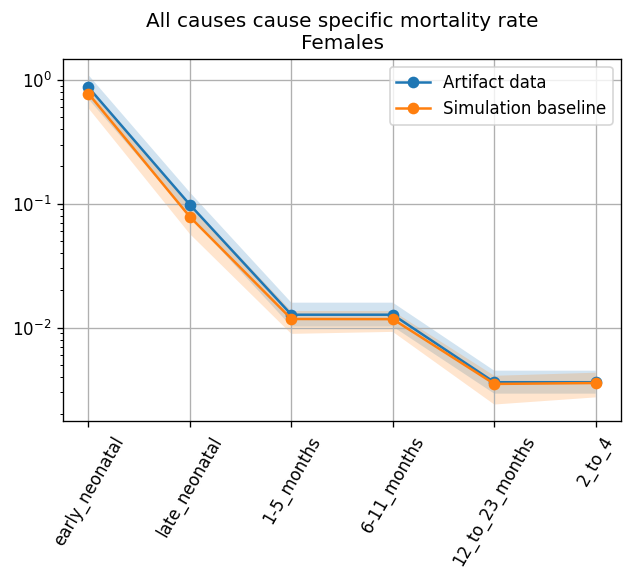

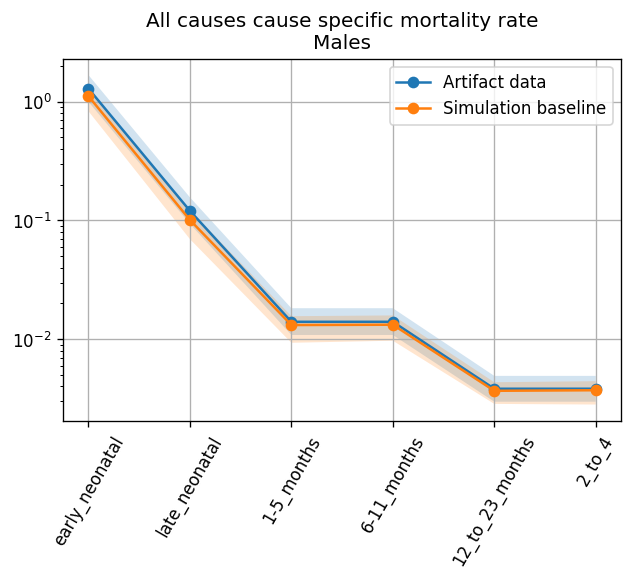

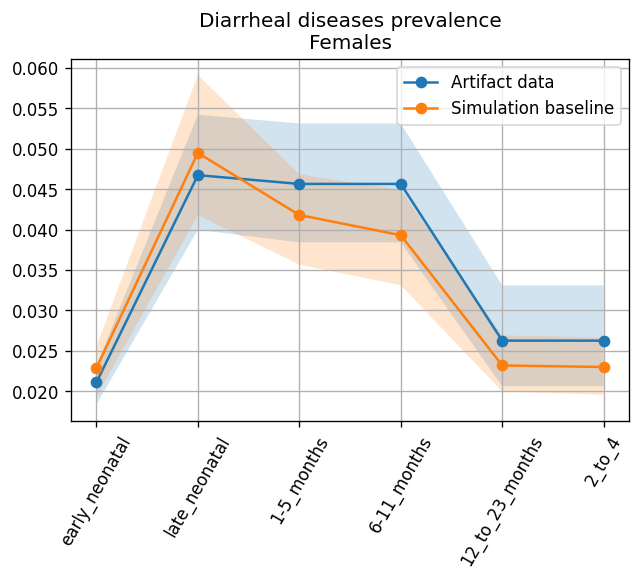

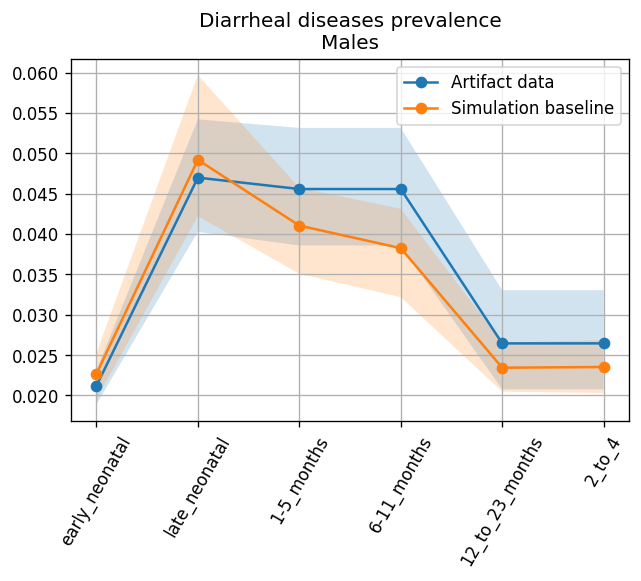

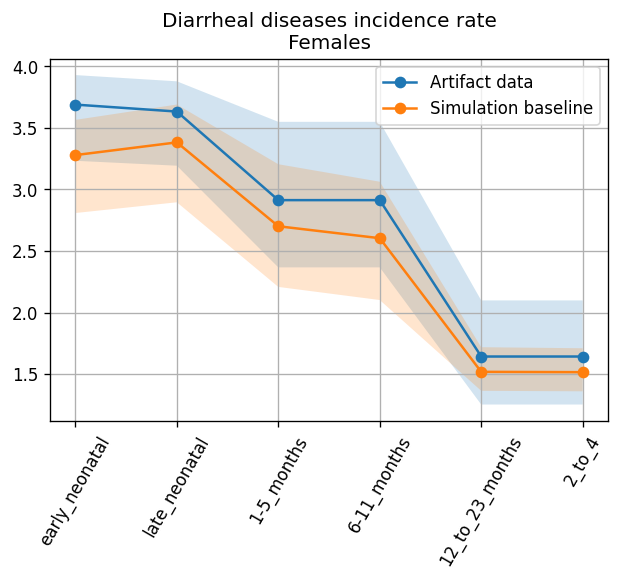

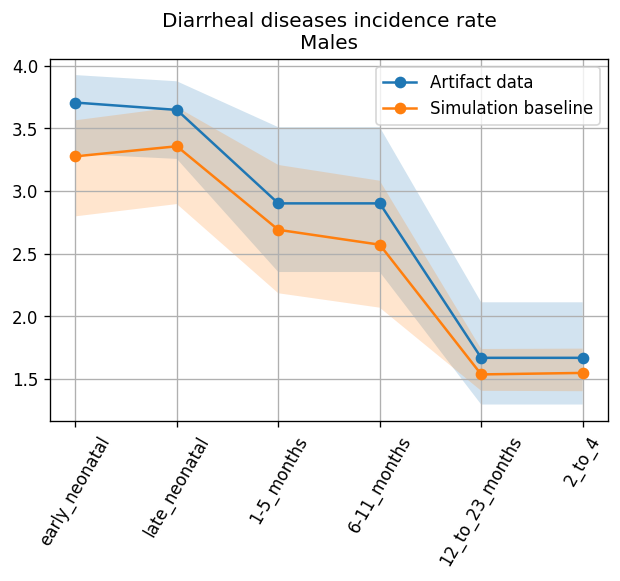

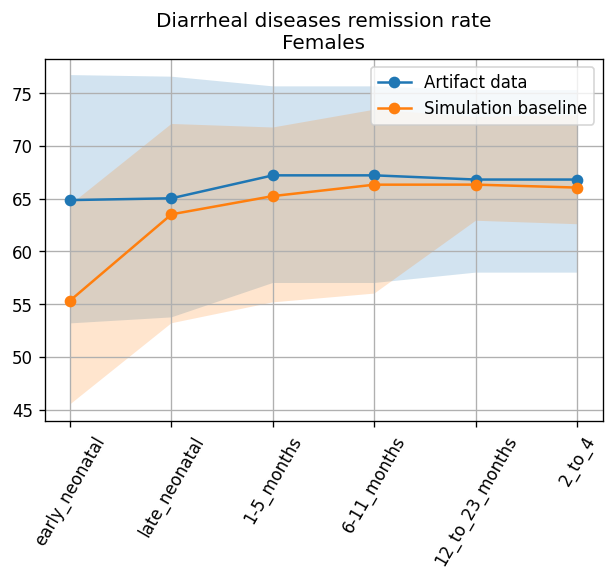

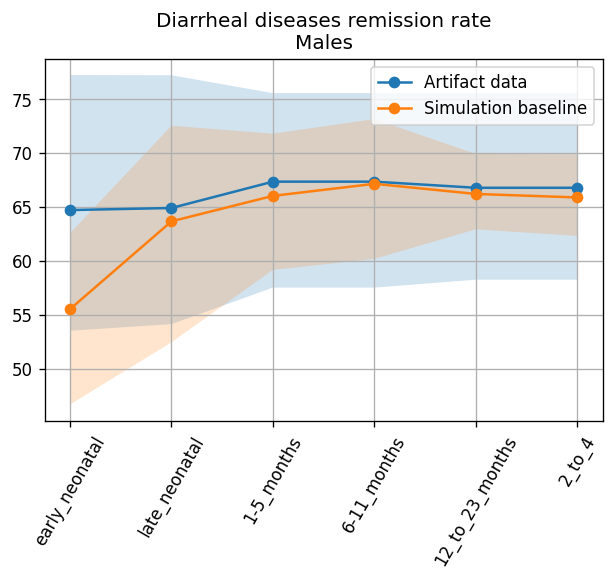

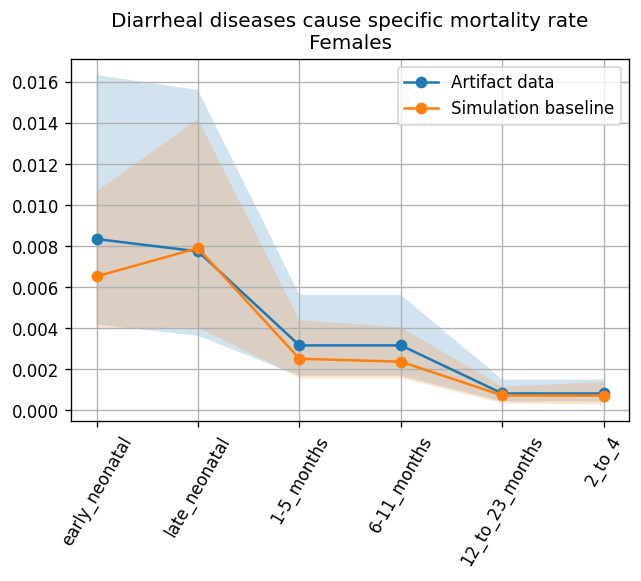

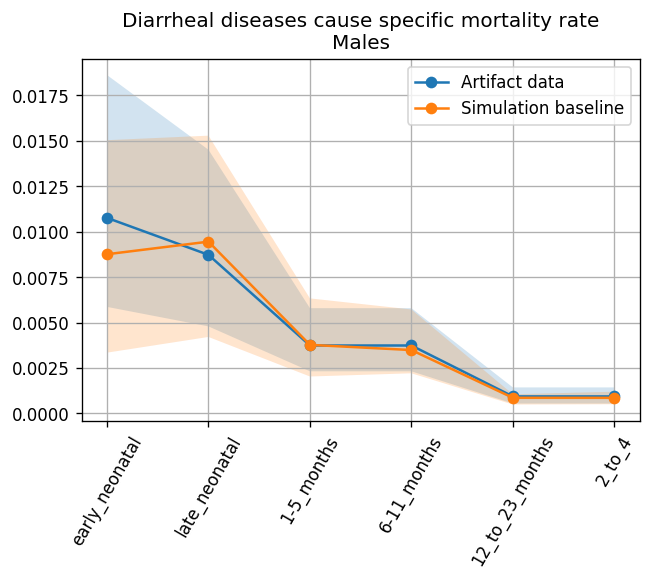

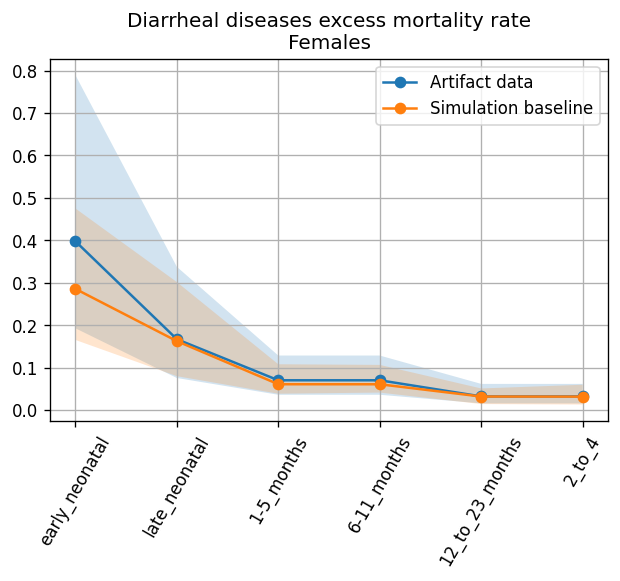

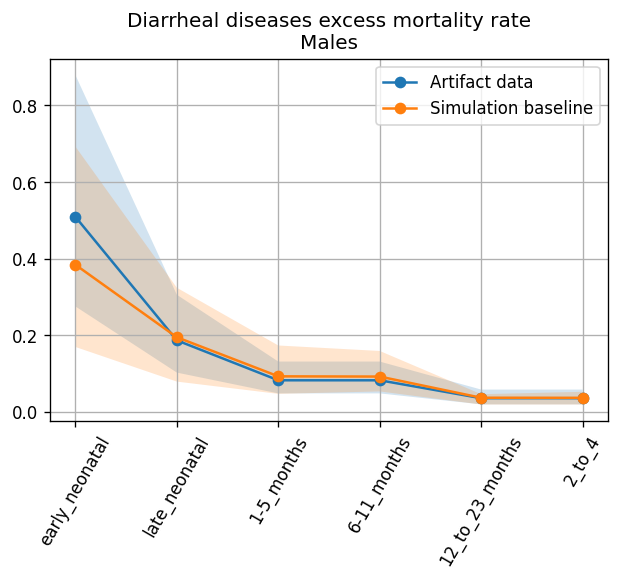

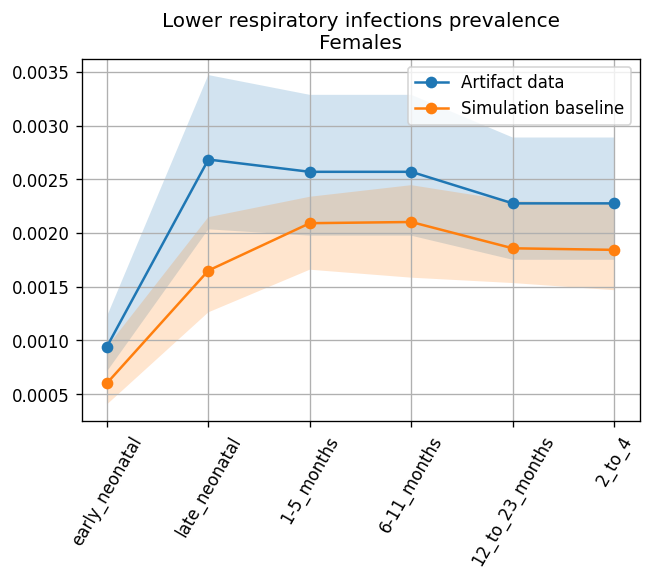

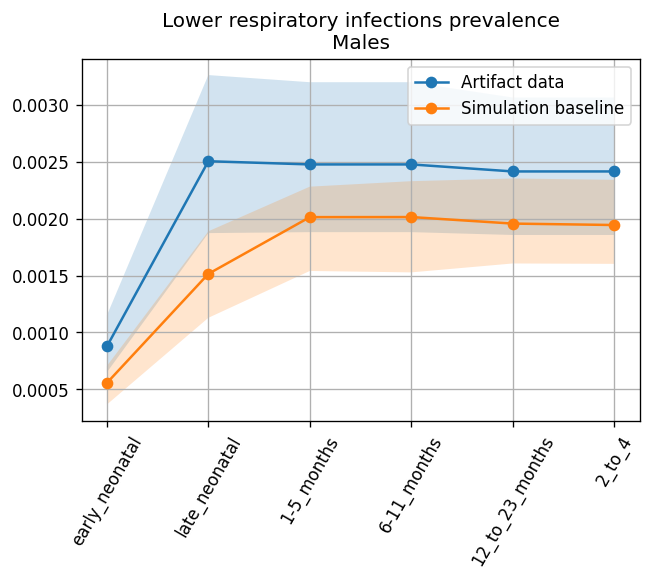

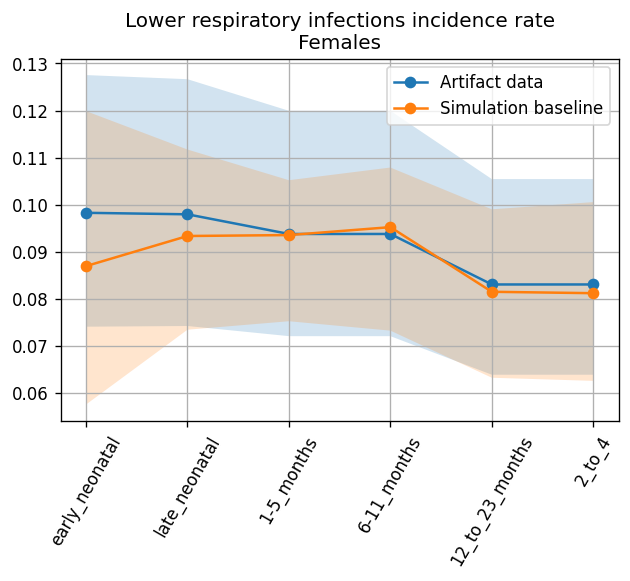

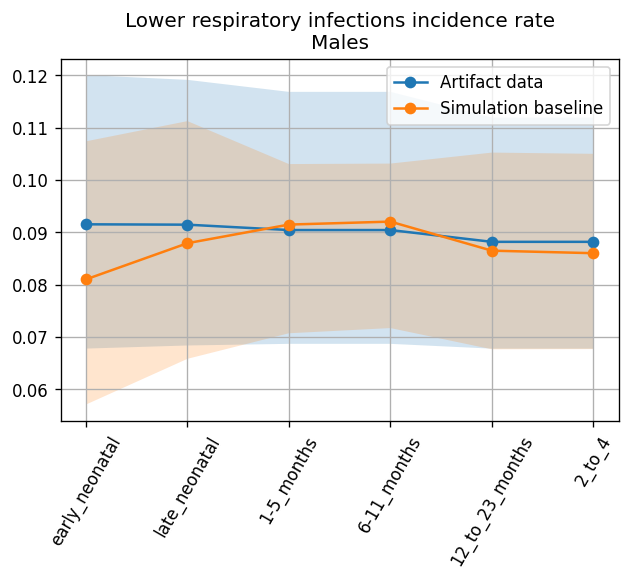

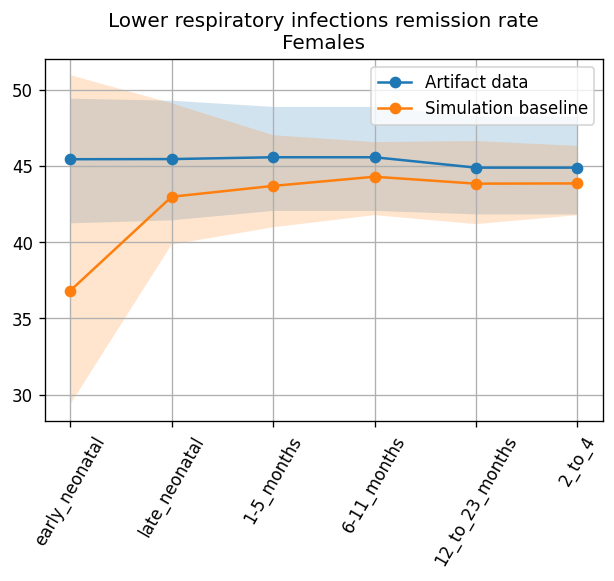

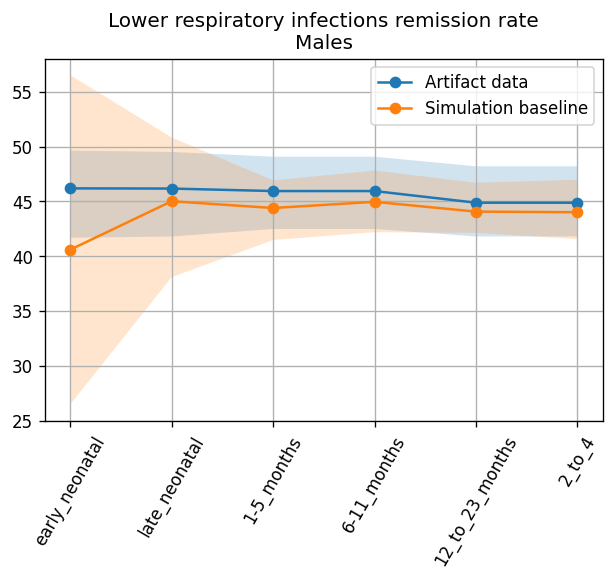

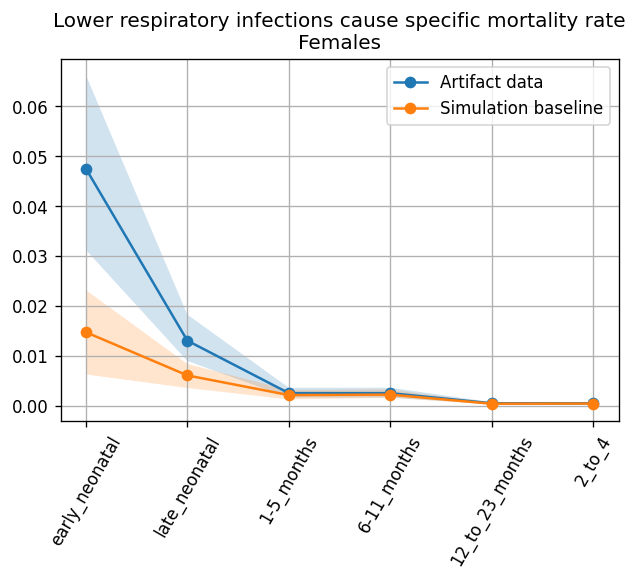

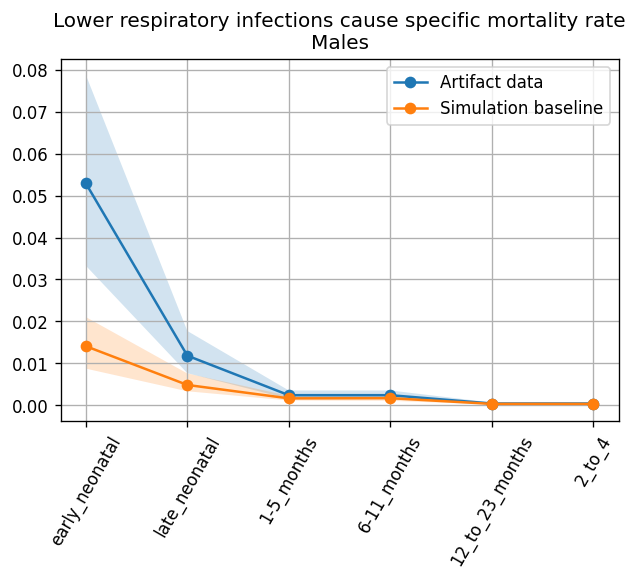

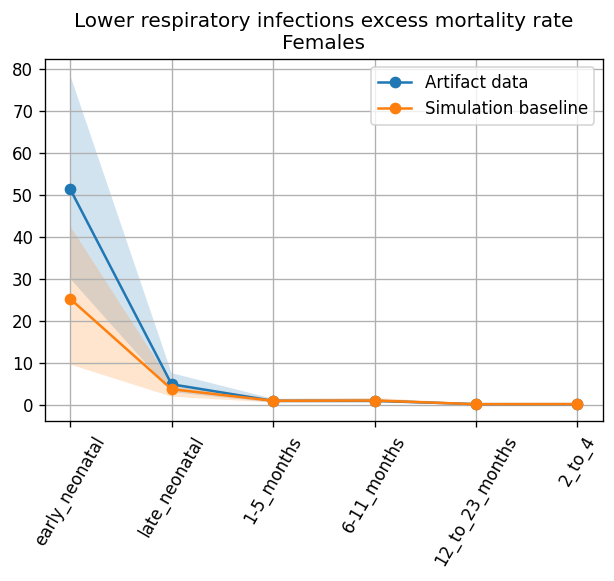

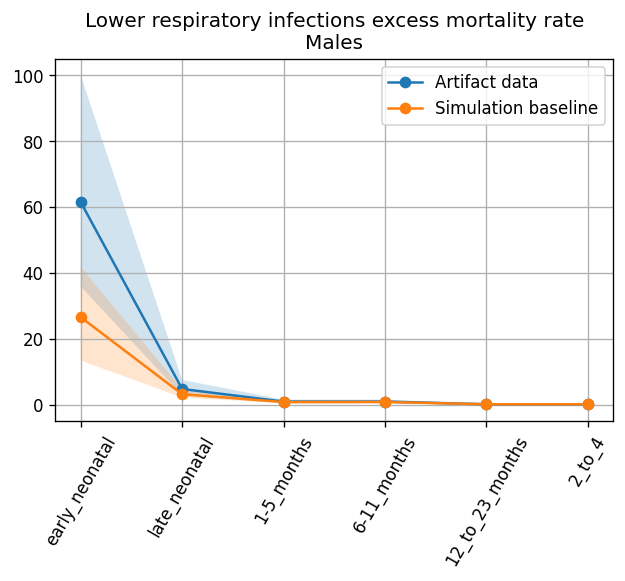

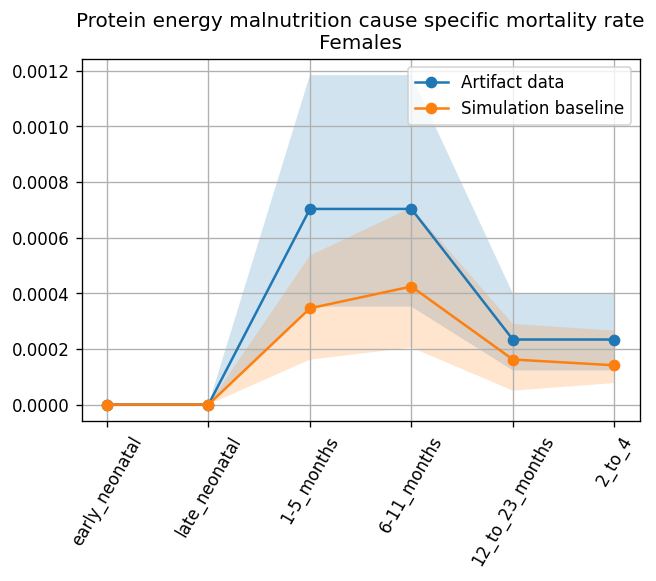

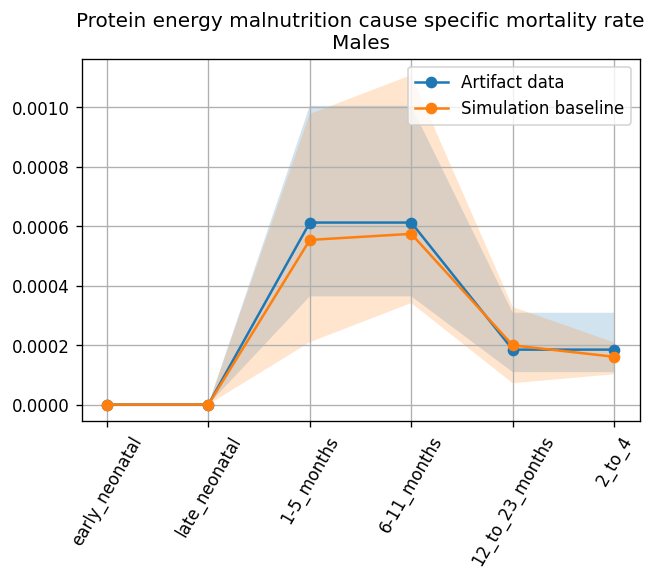

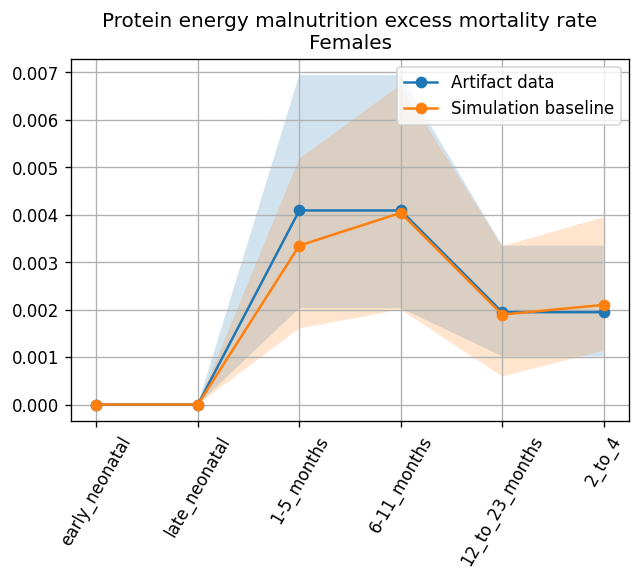

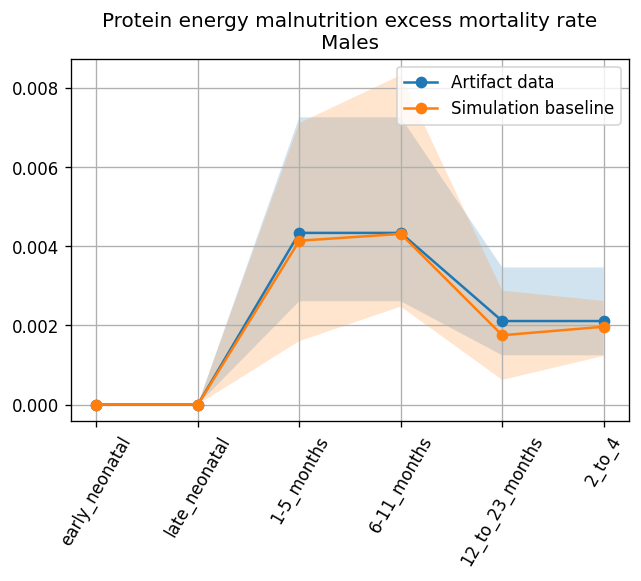

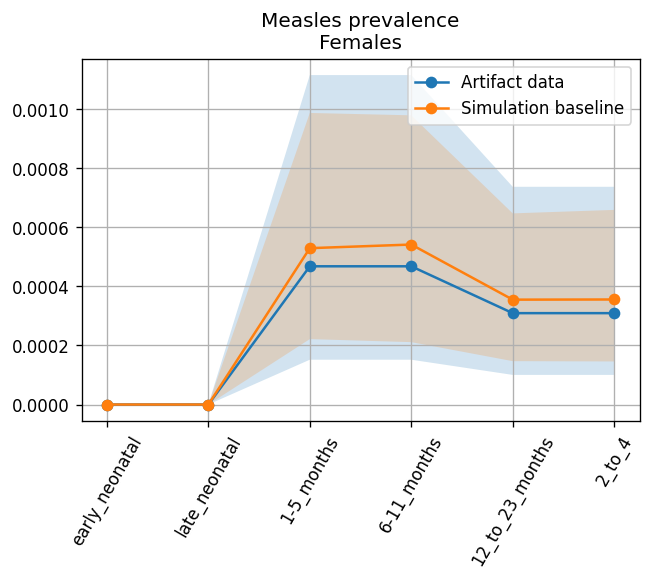

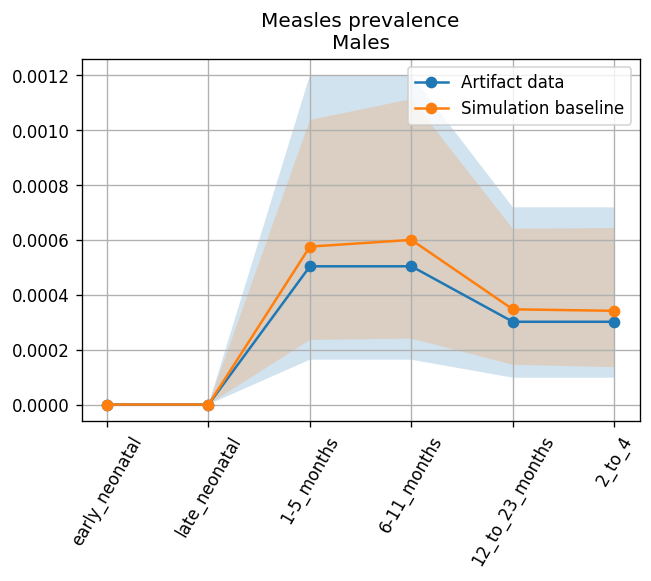

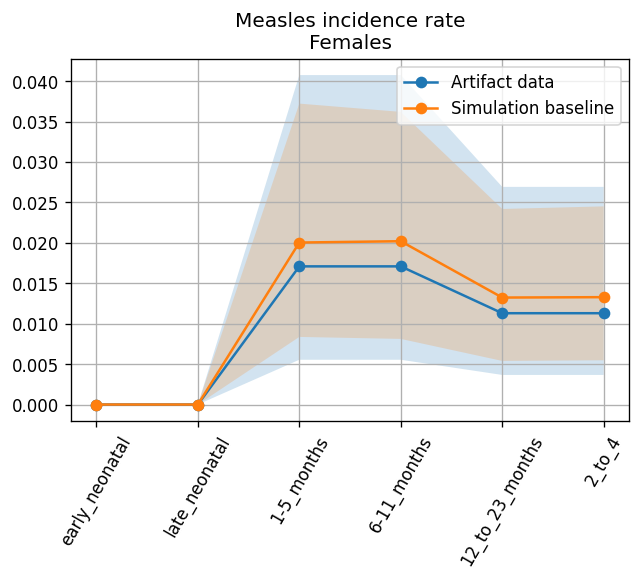

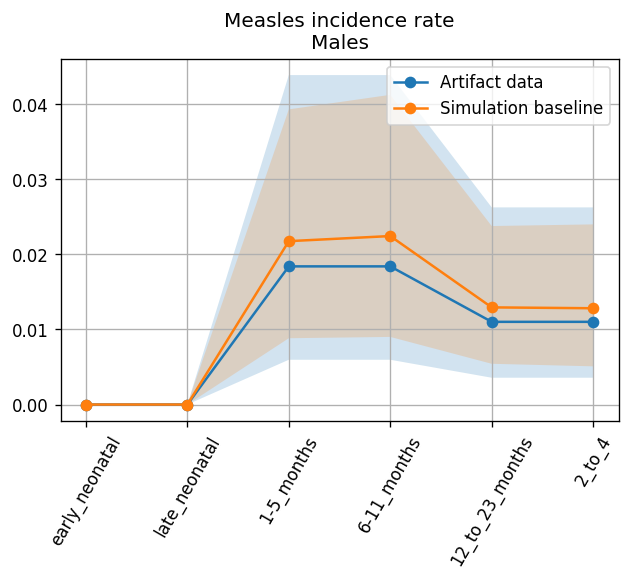

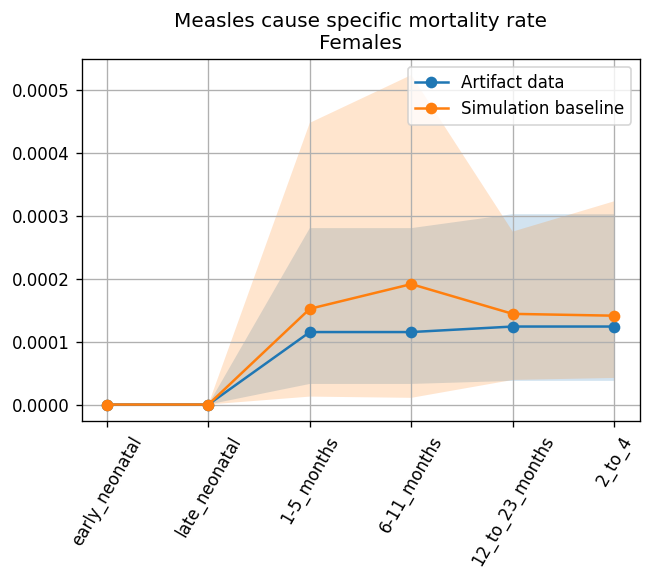

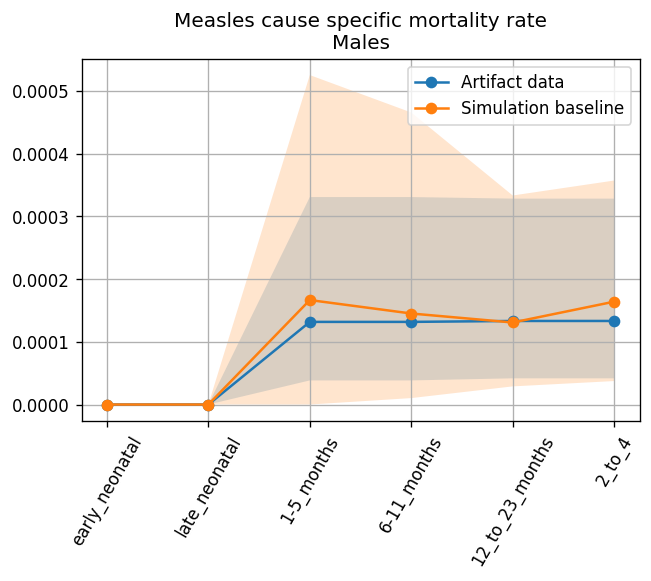

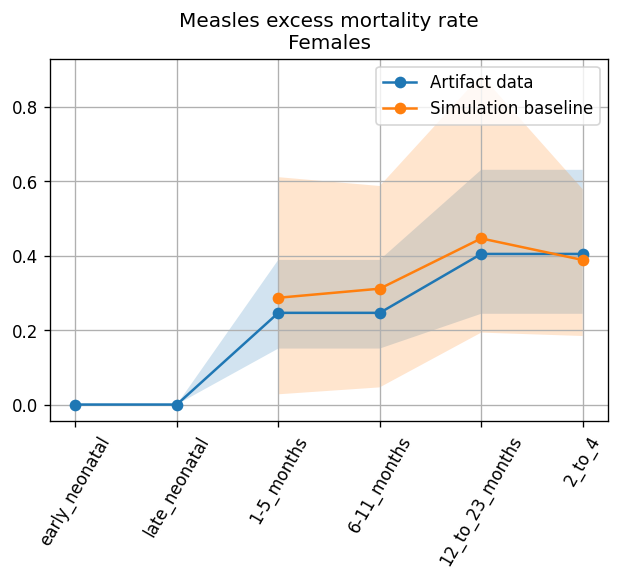

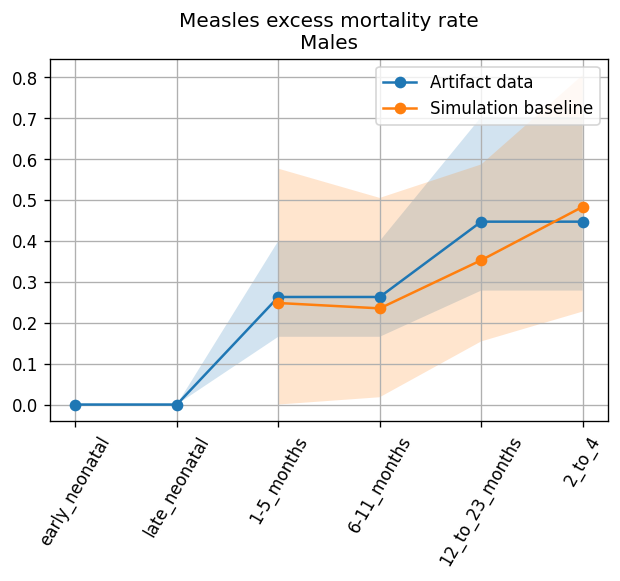

In [38]:
with PdfPages(f'plots/{figname}_cause_verification.pdf') as pdf:
    causes=['all_causes','diarrheal_diseases','lower_respiratory_infections','protein_energy_malnutrition','measles']
    measures=['prevalence','incidence_rate','remission_rate',
                   'cause_specific_mortality_rate','excess_mortality_rate']
    for cause in causes:
        for measure in measures:
            for sex in ['female','male']:
                try:
                    plot_cause_data(measure, cause, sex)
                    pdf.savefig(bbox_inches='tight')
                except:
                    pass